##### Задание 1
Импортируйте библиотеки pandas, numpy и matplotlib.
Загрузите "Boston House Prices dataset" из встроенных наборов
данных библиотеки sklearn.
Создайте датафреймы X и y из этих данных.
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.
Масштабируйте данные с помощью StandardScaler.
Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.
Постройте диаграмму рассеяния на этих данных.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()

In [3]:
X = pd.DataFrame(data=boston['data'], columns=boston['feature_names'])
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [4]:
y = pd.DataFrame(data=boston['target'], columns=['target'])
y.head()

,target
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
X_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
477,15.02340,0.0,18.10,0.0,0.6140,5.304,97.3,2.1007,24.0,666.0,20.2,349.48,24.91
15,0.62739,0.0,8.14,0.0,0.5380,5.834,56.5,4.4986,4.0,307.0,21.0,395.62,8.47
332,0.03466,35.0,6.06,0.0,0.4379,6.031,23.3,6.6407,1.0,304.0,16.9,362.25,7.83
423,7.05042,0.0,18.10,0.0,0.6140,6.103,85.1,2.0218,24.0,666.0,20.2,2.52,23.29
19,0.72580,0.0,8.14,0.0,0.5380,5.727,69.5,3.7965,4.0,307.0,21.0,390.95,11.28


In [7]:
X_test.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
173,0.09178,0.0,4.05,0.0,0.510,6.416,84.1,2.6463,5.0,296.0,16.6,395.50,9.04
274,0.05644,40.0,6.41,1.0,0.447,6.758,32.9,4.0776,4.0,254.0,17.6,396.90,3.53
491,0.10574,0.0,27.74,0.0,0.609,5.983,98.8,1.8681,4.0,711.0,20.1,390.11,18.07
72,0.09164,0.0,10.81,0.0,0.413,6.065,7.8,5.2873,4.0,305.0,19.2,390.91,5.52
452,5.09017,0.0,18.10,0.0,0.713,6.297,91.8,2.3682,24.0,666.0,20.2,385.09,17.27


In [8]:
y_train.head()

,target
477,12.0
15,19.9
332,19.4
423,13.4
19,18.2


In [9]:
y_test.head()

,target
173,23.6
274,32.4
491,13.6
72,22.8
452,16.1


In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
sc = StandardScaler()

In [12]:
X_train_scaled = pd.DataFrame(sc.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(sc.transform(X_test), columns=X_test.columns)

In [13]:
from sklearn.manifold import TSNE

In [14]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

In [15]:
X_train_tsne = tsne.fit_transform(X_train_scaled)
X_test_tsne = tsne.fit_transform(X_test_scaled)

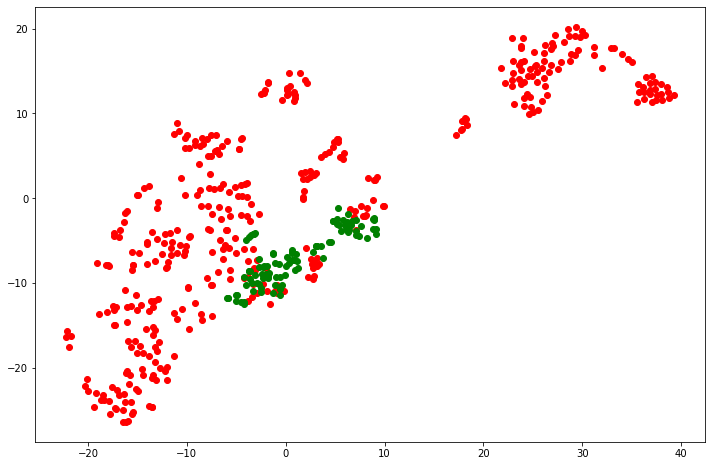

In [16]:
plt.rcParams['figure.figsize'] = [12, 8]
plt.scatter(X_train_tsne[:,0], X_train_tsne[:, 1], c='red')
plt.scatter(X_test_tsne[:,0], X_test_tsne[:, 1], c='green')
plt.show()

##### Задание 2
С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.
Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.
Вычислите средние значения price и CRIM в разных кластерах.

In [17]:
from sklearn.cluster import KMeans

In [18]:
kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)
labels_train = kmeans.fit_predict(X_train_scaled)

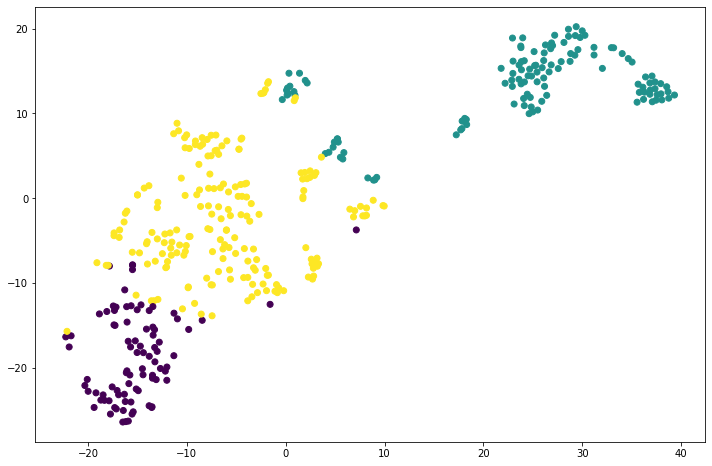

In [19]:
plt.scatter(X_train_tsne[:,0], X_train_tsne[:, 1], c=labels_train)
plt.show()

In [20]:
y_train.loc[labels_train == 0, 'target'].mean() #Средняя цена в кластере 0

27.788372093023252

In [21]:
y_train.loc[labels_train == 1, 'target'].mean() #Средняя цена в кластере 1

16.165354330708666

In [22]:
y_train.loc[labels_train == 2, 'target'].mean() #Средняя цена в кластере 2

24.958115183246072

In [23]:
X_train.loc[labels_train == 0, 'CRIM'].mean() #Среднее значение CRIM в кластере 0

0.07356558139534886

In [24]:
X_train.loc[labels_train == 1, 'CRIM'].mean() #Среднее значение CRIM в кластере 1

10.797028425196853

In [25]:
X_train.loc[labels_train == 2, 'CRIM'].mean() #Среднее значение CRIM в кластере 2

0.42166020942408367

##### Задание 3
Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.
Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.

In [26]:
labels_test = kmeans.predict(X_test_scaled)

In [27]:
y_test.loc[labels_test == 0, 'target'].mean() #Средняя цена в кластере 0

31.35

In [28]:
y_test.loc[labels_test == 1, 'target'].mean() #Средняя цена в кластере 1

16.437142857142856

In [29]:
y_test.loc[labels_test == 2, 'target'].mean() #Средняя цена в кластере 2

21.860784313725492

In [30]:
X_test.loc[labels_test == 0, 'CRIM'].mean() #Среднее значение CRIM в кластере 0

0.062060000000000004

In [31]:
X_test.loc[labels_test == 1, 'CRIM'].mean() #Среднее значение CRIM в кластере 1

10.165531142857143

In [32]:
X_test.loc[labels_test == 2, 'CRIM'].mean() #Среднее значение CRIM в кластере 2

0.26607882352941176